# Logistic Regression

In this chapter the logistic regression algorithm is applied to the macro- and microstrucutral data. The procedure is analogous to both kind of data. First, the data is prepared in terms of making it suitable to use it in the code efficiently. Second, the logistic regression model is built, defining the input and output variables, scaling the relevant variables and splitting the data set into training and testing samples and subsequently training the model. Followed by evulating the model, we will refer to different metrics that provide information on how the model performs. 

We first start with **cortical thickness (CT)**.

## 1. Macro-structural data: Cortical Thickness (CT)

### 1.1 Data preperation

In the beginning, all relevant modules needed for the analysis are imported. 

In [2]:
#import relevant modules

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Again, to read the data, the os.pardir() function is used to make the code reproducible independent of different operating systems. 

In [3]:
#read data

CT_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_thickness_Dublin.csv')
CT_Dublin = pd.read_csv(CT_Dublin_path)

In [4]:
CT_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON9225,21,2,1,2.180,2.382,2.346,2.526,2.747,2.544,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,CON9229,28,2,1,2.394,1.973,2.534,2.439,2.485,2.435,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,CON9231,29,2,1,2.551,2.567,1.954,2.439,2.428,2.190,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,GASP3037,61,1,2,2.187,1.923,2.160,2.410,2.381,2.277,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,GASP3040,47,1,2,1.862,1.750,2.129,2.516,2.244,2.169,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,RPG9019,31,1,2,2.240,2.150,1.995,2.254,2.164,2.008,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,RPG9102,42,2,2,2.269,2.124,2.531,2.502,2.250,2.183,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,RPG9119,41,1,2,2.273,2.559,2.578,2.463,2.463,2.053,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,RPG9121,51,1,2,1.940,2.438,2.272,2.272,2.610,2.099,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


The data contains variables such as SubjectID, Age and Sex which are not relevant for the classification. Hence, we adjust the dataframe accordingly.

In [5]:
#adjust dataframe

CT_Dublin_adj = CT_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [6]:
CT_Dublin_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,1,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,1,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,1,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,2,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,2,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,2,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,2,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,2,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


As the dataframe shows, the Group variable contains information of whether the samples belong to control or patient. In this case, 1 indicates control and 2 patient. In order to perform a **Logistic Regression**, the labels of the outputs require to be 0 and 1 since the probability of an instance belonging to a default class is computed.

In [7]:
#label group 1 as 0 and 2 as 1

CT_Dublin_adj['Group'] = CT_Dublin_adj['Group'].replace([1,2],[0, 1])

In [8]:
CT_Dublin_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,0,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,0,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,0,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,1,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,1,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,1,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,1,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,1,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [9]:
#get shape of df_adj

CT_Dublin_adj.shape

(108, 309)

Because the LogisticRegression function from sklearn requires the inputs to be numpy arrays, in the following step the dataframe is converted to a numpy array.

In [10]:
#dataframe as numpy array 

CT_Dublin_adj.to_numpy()

array([[0.   , 2.18 , 2.382, ..., 2.776, 3.282, 3.347],
       [0.   , 2.394, 1.973, ..., 2.654, 3.124, 3.214],
       [0.   , 2.551, 2.567, ..., 2.495, 2.669, 2.886],
       ...,
       [1.   , 2.273, 2.559, ..., 2.294, 2.571, 2.875],
       [1.   , 1.94 , 2.438, ..., 2.51 , 2.759, 2.838],
       [1.   , 2.108, 2.269, ..., 2.551, 2.855, 2.985]])

### 2.1.2 Building the model

In the next steps, the **logistic regression** model is built. Firstly, the input and output should be defined. Our input contains the **CT** for all of the 308 brain regions, meaning that there are n=308 features in total. The output is within the Group variable containing label information.

In [66]:
#define input

X = CT_Dublin_adj.iloc[:,1:309].values

In [67]:
X

array([[2.18 , 2.382, 2.346, ..., 2.776, 3.282, 3.347],
       [2.394, 1.973, 2.534, ..., 2.654, 3.124, 3.214],
       [2.551, 2.567, 1.954, ..., 2.495, 2.669, 2.886],
       ...,
       [2.273, 2.559, 2.578, ..., 2.294, 2.571, 2.875],
       [1.94 , 2.438, 2.272, ..., 2.51 , 2.759, 2.838],
       [2.108, 2.269, 2.145, ..., 2.551, 2.855, 2.985]])

In [68]:
X.shape

(108, 308)

In [14]:
#output

y = CT_Dublin_adj.iloc[:,[0]].values

In [15]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [16]:
y.shape

(108, 1)

The numpy.ravel() functions returns contiguous flattened array (1D array with all the input-array elements and with the same type as it). This step is required for the upcoming analyses. 

In [17]:
y = y.ravel()

In [18]:
y.shape

(108,)

Now having defined our input and ouput data, to build the logistic regression model we need to split our data into train and test sets. For this, we use the train_test_split splitter function from Sklearn. The training set is the dataset on which the model is trained. This data is seen and learned by the model. The test set is a a subset of the training set and utilized for an accurate evaluation of a final model fit.
With that function, the data gets divided into X_train, X_test, y_train and y_test. X_train and y_train are used for training and fitting the model. The X_test and y_test sets, however, are used for training the model if the correct labels were predicted. 

But before splitting the data into training and testing set, we use the StandardScaler() function to standardize our data. The function standardizes every feature (each column) indivudally by substracting the mean and then scaling to unit variance (dividing all the values by the standard deviation). As a result, we get a distribution with a mean equal to 0 and with a standard deviation equal to 1. 

Also, with such a small sample, the N=27 participants (108 * 25%) in the testing sample could differ considerably from the training sample by chance. To tackle this problem, we can run the cross validation for multiple iterations.

In [152]:
n_iter = 5000
y_preds = []
y_tests = []


# scale before splitting into test and train samples
X_sc = StandardScaler().fit_transform(X)

for i in range(n_iter):
    
    # take a new testing and training sample
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.25, random_state = i)
    y_tests.append(y_test)  # store the y_test sample
 
    
    # fit the logistic regression
    classifier = LogisticRegression(random_state = i, solver ='liblinear')
    classifier.fit(X_train, y_train)
    
    # get the y predictions and store
    y_pred = classifier.predict(X_test)
    y_preds.append(y_pred)

The test size indicates the size of the test subset, a random sampling without replacement about 75% of the rows , the remaining 25% is put into the test set. The random_state parameter allows you to reproduce the same train test split each time when the code is run. With a different value for random_state, different information would flow into the train and test sets. 

The following outputs show the first five lines of the iterations for our predicted y values and y testing values.

In [70]:
y_preds[:5]

[array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1]),
 array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1])]

In [71]:
y_tests[:5]

[array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 0]),
 array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0]),
 array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1])]

In the following, we can concatenate the the y_pred and y_test results from each iteration and use this to compute the confusion matrix. 

In [85]:
y_preds = np.concatenate([y_preds],axis =0)

y_preds

array([1, 0, 1, ..., 1, 1, 1])

In [104]:
y_tests = np.concatenate([y_tests],axis =0)
y_tests

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

We also concateante our X_tests values as it is needed for the **ROC** curve (see further below).

In [113]:
X_tests = np.concatenate([X_tests])

### 2.1.3 Model evaluation

In the next section, we will have a look at how the logistic regression model performs and evaluate it. To evaluate the model, a look at different measurements such as the **confusion matrix**, **accuracy, precision and recall** and the **receiver operation characteristic curve (ROC-curve)** is helpful.

#### 2.1.3.1 Confusion Matrix

The **confusion matrix** provides information on the quality of the logistic regression model since it shows the predicted values from the model compared to the actual values from the test dataset. We scale this by the sum of the array (i.e., cm/np.sum(cm)) to get probabilities for hits, misses, false positives and true negatives.

In [182]:
cm_CT = confusion_matrix(y_tests, y_preds)

cm_CT_f = cm_CT/np.sum(cm_CT)

print("Confusion Matrix : \n", cm_f)

ValueError: multilabel-indicator is not supported

To make the confusion matrix visually more appealing, we run the following code.

NameError: name 'cm_CT_f' is not defined

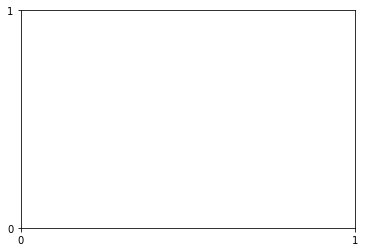

In [181]:
class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm_CT_f), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion Matrix for Cortical Thickness', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

The upper left square in the **confusion matrix** contains all the **true positive** cases meaning that when a participant predicted as control belongs to the control group (hits). Accordingly, the bottom right square carries information on **true negative** cases meaning a participant predicted as patient was a patient. On the contrary, the upper right square contains **false positives** cases (participant predicted as patient but was control) and the bottom left square contains information on **false negative** cases (misses, participant predicted as control but was patient).

The confusion matrix shows us that the probability for **hits** is around 43%, for **true negatives** around 25%. The probability for **misses** is around 0.8%. The probability for **false positive** cases is around 31%. To get more insight on how the model performs, there are other measures indicating the qualtiy of the model such as **accuracy, precision, recall and F1-Score**.

#### 2.1.3.2 Model accuracy, precision and recall

The **accuracy** measure indicates the percentage of correct predictions. The **precision** measure shows the correct positive predictions relative to total positive predictions. The **recall** measure indicates the correct positive predictions relative to total actual positives. The **F1-Score** is a measure of a test’s accuracy — it is the harmonic mean of precision and recall. Overall, it is a measure of the preciseness and robustness of your model.


In [162]:
#compute accuracy, precision, recall

print("Accuracy:",metrics.accuracy_score(y_tests, y_preds)) 

print("Precision:",metrics.precision_score(y_tests, y_preds)) 

print("Recall:",metrics.recall_score(y_tests, y_preds)) 

print("F1-Score:", metrics.f1_score(y_tests, y_preds))

Accuracy: 0.0


ValueError: Target is multilabel-indicator but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted', 'samples'].

#### 2.1.3.3 Receiver operating characteristic (ROC-Curve)

Another measure that provides information on the diagnostic ability of a binary classifier is a **Receiver Operator Characteristic (ROC) curve**. A ROC curve plots the true positiv rate (proportion of observations that were correctly predicted to be positive out of all positive observations) on the y-axis against the false positive rate (proportion of observations that are incorrectly predicted to be positiv out of all negative observations)on the x-axis

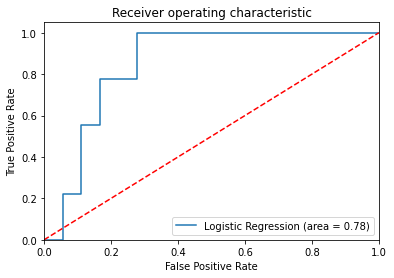

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Curves closer to the top-left corner indicate a better performance of the classifier. The closer the curve comes to the 45-degree diagonal of the ROC space, the less acurate the classifier is. As the plot shows, our model does not perform very well.

## 2.2 Micro-structural data: mean diffusivity and fractional anisotropy

In the following section, the logistic regression model is computed for micro-structural data in an analogous way as for the macro-structural data. 

### 2.2.1 Mean diffusivity

First, we prepare our data to use it in the code efficiently and adjust it for the logistic regression accordingly.

#### 2.2.1.1 Data preparation

In [30]:
#read data

MD_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_MD_cortexAv_mean_Dublin.csv')
MD_Dublin = pd.read_csv(MD_Dublin_path)

In [31]:
#adjust dataframe

MD_Dublin_adj = MD_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [32]:
#label group 1 as 0 and 2 as 1

MD_Dublin_adj['Group'] = MD_Dublin_adj['Group'].replace([1,2],[0, 1])

In [33]:
MD_Dublin_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,0,0.911,0.931,0.891,1.048,0.881,0.939,1.124,0.986,1.045,...,0.928,1.067,1.096,0.892,1.238,1.021,1.166,0.900,0.907,0.937
1,0,0.861,0.913,0.846,0.927,0.888,0.894,0.924,1.040,1.093,...,0.878,0.985,1.045,1.001,1.196,1.083,1.143,0.917,0.923,0.960
2,0,0.817,0.827,0.828,0.828,0.780,0.843,0.825,0.848,0.838,...,0.847,0.849,0.819,0.952,0.933,0.942,1.059,0.794,0.834,0.860
3,0,0.887,0.905,0.878,0.932,0.820,0.888,0.970,0.918,0.900,...,0.957,0.985,0.989,1.075,1.150,1.017,0.986,0.888,0.916,0.928
4,0,0.887,0.854,0.905,1.011,0.946,0.922,1.034,1.126,1.114,...,0.871,0.952,0.987,1.325,0.996,1.094,1.064,0.966,0.989,0.977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1,0.843,0.855,0.940,1.017,0.954,0.840,1.128,1.012,0.997,...,0.938,1.062,1.143,0.903,1.364,1.284,1.218,1.017,0.972,1.028
111,1,0.911,0.914,0.926,1.001,0.918,1.115,1.036,1.026,1.001,...,0.957,1.085,1.098,1.059,1.268,1.089,1.173,0.990,1.065,1.021
112,1,0.890,0.899,0.886,0.930,0.883,0.882,0.883,1.190,1.101,...,0.916,1.010,0.974,0.968,1.305,1.168,1.265,0.981,0.975,0.972
113,1,0.920,0.986,0.883,0.879,0.794,0.983,1.029,1.076,1.053,...,0.942,0.985,0.990,1.199,1.353,1.187,1.444,0.947,1.047,1.085


In [34]:
#dataframe as numpy array 

MD_Dublin_adj.to_numpy()

array([[0.   , 0.911, 0.931, ..., 0.9  , 0.907, 0.937],
       [0.   , 0.861, 0.913, ..., 0.917, 0.923, 0.96 ],
       [0.   , 0.817, 0.827, ..., 0.794, 0.834, 0.86 ],
       ...,
       [1.   , 0.89 , 0.899, ..., 0.981, 0.975, 0.972],
       [1.   , 0.92 , 0.986, ..., 0.947, 1.047, 1.085],
       [1.   , 0.97 , 0.868, ..., 1.125, 1.11 , 1.139]])

#### 2.2.1.2 Build the model

In the next step, the input and output for our model is defined. For that, we use the **MD** for each 308 cortical region as input and the label whether a participant belongs to the control or patient group as output.

In [128]:
#define input

X_MD = MD_Dublin_adj.iloc[:,1:309].values

In [129]:
#output

y_MD = MD_Dublin_adj.iloc[:,[0]].values

In [131]:
y_MD.shape

(115, 1)

To return a 1D flattened array since its required for further analyses, the .ravel() function is used!

In [134]:
y_MD = y_MD.ravel()

In [135]:
y_MD.shape

(115,)

In [40]:
X_MD

array([[0.911, 0.931, 0.891, ..., 1.166, 0.9  , 0.907],
       [0.861, 0.913, 0.846, ..., 1.143, 0.917, 0.923],
       [0.817, 0.827, 0.828, ..., 1.059, 0.794, 0.834],
       ...,
       [0.89 , 0.899, 0.886, ..., 1.265, 0.981, 0.975],
       [0.92 , 0.986, 0.883, ..., 1.444, 0.947, 1.047],
       [0.97 , 0.868, 0.94 , ..., 1.284, 1.125, 1.11 ]])

Again, we build our model with 5000 iterations.

In [136]:
n_iter_MD = 5000
y_preds_MD = []
y_tests_MD = []

# scale before splitting into test and train samples
X_sc_MD = StandardScaler().fit_transform(X_MD)

for i in range(n_iter):
    # take a new testing and training sample
    X_train_MD, X_test_MD, y_train_MD, y_test_MD = train_test_split(X_sc_MD, y_MD, test_size = 0.25, random_state = i)
    y_tests_MD.append(y_test_MD)  # store the y_test sample
    
    # fit the logistic regression
    classifier_MD = LogisticRegression(random_state = i, solver ='liblinear')
    classifier_MD.fit(X_train_MD, y_train_MD)
    
    # get the y predictions and store
    y_pred_MD = classifier_MD.predict(X_test_MD)
    y_preds_MD.append(y_pred_MD)

In the following steps, we again concatenate the values to compute the confusion matrix.

In [137]:
y_preds_MD = np.concatenate(y_preds_MD)

In [138]:
y_tests_MD = np.concatenate(y_tests_MD)

#### 2.2.1.3 Model evaluation

##### 2.2.1.3.1 Confusion matrix

In [178]:
#confusion matrix

cm_MD = confusion_matrix(y_tests_MD, y_preds_MD)

cm_MD_f = cm_MD/np.sum(cm_MD)
  
print ("Confusion Matrix : \n", cm_MD_f)

Confusion Matrix : 
 [[0.53733103 0.17482759]
 [0.07247586 0.21536552]]


To plot the confusion matrix visually more appealing again, the following code can be run.

Text(0.5, 257.44, 'Predicted label')

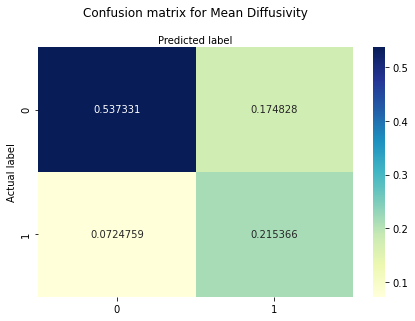

In [160]:
class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm_MD_f), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Mean Diffusivity', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

The confusion matrix reveals the probability for **hits** is around 54%, for **true negatives** around 22%. The probability for **misses** is around 7%. The probability for **false positive** cases is around 17%. 

##### 2.2.1.3.2  Model accuracy, precision and recall

In [161]:
#compute accuracy, precision, recall

print("Accuracy:",metrics.accuracy_score(y_tests_MD, y_preds_MD)) 

print("Precision:",metrics.precision_score(y_tests_MD, y_preds_MD)) 

print("Recall:",metrics.recall_score(y_tests_MD, y_preds_MD)) 

print("F1-Score:", metrics.f1_score(y_tests_MD, y_preds_MD))

Accuracy: 0.752696551724138
Precision: 0.5519459860723249
Recall: 0.7482090231688909
F1-Score: 0.6352642018003356


##### 2.2.1.3.3 ROC-curve

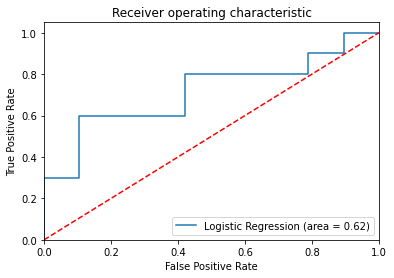

In [148]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_MD, classifier_MD.predict(X_test_MD))
fpr, tpr, thresholds = roc_curve(y_test_MD, classifier_MD.predict_proba(X_test_MD)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

As the plot reveals, the model performs worse than for **CT**.

### 2.2.2 Fractional anisotropy

Now, the same procedure is applied for **FA**. 

#### 2.2.2.1 Data preparation

First, the data is adjusted accordingly. 

In [48]:
#read data

FA_Dublin_path = os.path.join(os.pardir, 'data', 'PARC_500.aparc_FA_cortexAv_mean_Dublin.csv')
FA_Dublin = pd.read_csv(FA_Dublin_path)

In [49]:
#adjust dataframe

FA_Dublin_adj = FA_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [50]:
#label group 1 as 0 and 2 as 1

FA_Dublin_adj['Group'] = FA_Dublin_adj['Group'].replace([1,2],[0, 1])

In [51]:
#dataframe as numpy array 

FA_Dublin_adj.to_numpy()

array([[0.   , 0.322, 0.147, ..., 0.157, 0.147, 0.137],
       [0.   , 0.302, 0.155, ..., 0.152, 0.148, 0.152],
       [0.   , 0.324, 0.18 , ..., 0.171, 0.174, 0.143],
       ...,
       [1.   , 0.323, 0.173, ..., 0.181, 0.143, 0.151],
       [1.   , 0.311, 0.174, ..., 0.162, 0.145, 0.123],
       [1.   , 0.294, 0.164, ..., 0.145, 0.147, 0.127]])

#### 2.2.2.2 Build the model

Again, the input and output variables are defined. Here, we take the **FA** values for every brain region as input.

In [165]:
#define input

X_FA = FA_Dublin_adj.iloc[:,1:309].values

In [53]:
#output

y_FA = FA_Dublin_adj.iloc[:,[0]].values

In [166]:
y_FA = y_FA.ravel()

In [171]:
n_iter_FA = 5000
y_preds_FA = []
y_tests_FA = []

# scale before splitting into test and train samples
X_sc_FA = StandardScaler().fit_transform(X_FA)

for i in range(n_iter):
    # take a new testing and training sample
    X_train_FA, X_test_FA, y_train_FA, y_test_FA = train_test_split(X_sc_FA, y_FA, test_size = 0.25, random_state = i)
    y_tests_FA.append(y_test_FA)  # store the y_test sample
    
    # fit the logistic regression
    classifier_FA = LogisticRegression(random_state = i, solver ='liblinear')
    classifier_FA.fit(X_train_FA, y_train_FA)
    
    # get the y predictions and store
    y_pred_FA = classifier_FA.predict(X_test_FA)
    y_preds_FA.append(y_pred_FA)

In [169]:
y_preds_FA = np.concatenate(y_preds_FA)

In [170]:
y_tests_FA = np.concatenate(y_tests_FA)

### 2.2.2.3 Model evaluation

#### 2.2.2.3.1 Confusion matrix

In [176]:
#confusion matrix

cm_FA = confusion_matrix(y_tests_FA, y_preds_FA)

cm_FA_f = cm_FA / np.sum(cm_FA)
  
    
print ("Confusion Matrix : \n", cm_FA_f)

ValueError: multilabel-indicator is not supported

Text(0.5, 257.44, 'Predicted label')

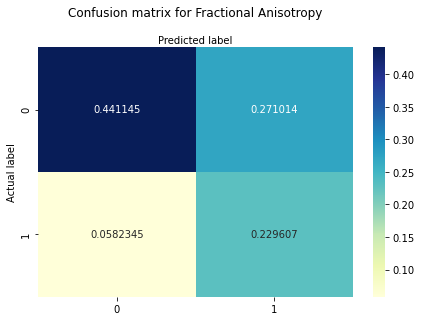

In [177]:
# plot the confusion matrix visually more appealing

class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm_FA_f), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix for Fractional Anisotropy', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

The confusion matrix shows that the probability for **hits** is around 44%, for **true negatives** around 23%. The probability for **misses** is around 6%. The probability for **false positive** cases is around 27%. 

#### 2.2.2.3.2 Model accuracy, precision and recall

In [173]:
#compute accuracy, precision, recall

print("Accuracy:",metrics.accuracy_score(y_tests_FA, y_preds_FA)) 

print("Precision:",metrics.precision_score(y_tests_FA, y_preds_FA)) 

print("Recall:",metrics.recall_score(y_tests_FA, y_preds_FA)) 

Accuracy: 0.0


ValueError: Target is multilabel-indicator but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted', 'samples'].

#### 2.2.2.3.3 ROC-curve

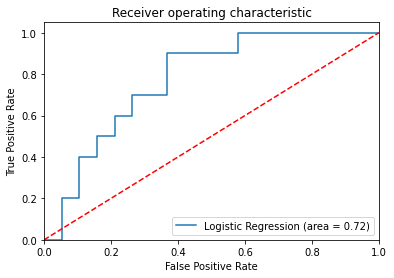

In [172]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_FA, classifier_FA.predict(X_test_FA))
fpr, tpr, thresholds = roc_curve(y_test_FA, classifier_FA.predict_proba(X_test_FA)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In the next pages, a different algorithm is applied to the data.